In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import torch
import pickle
import numpy as np
from collections import Counter
import glob
import collections
# read top neurons
import yaml 
import sys  
sys.path.append('../')
from cma import get_topk
import os

/tmp/ipykernel_205548/2227021985.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
import seaborn as sns
import pandas as pd 
top_neuron_path = '../../pickles/top_neurons/'
method_names = ['recent_baseline', 'baseline_fever','baseline_qqp_mysplit']
datasets_names = ['MNLI', 'FEVER',  'QQP'] 
seed = 1548
masking_mode = 'percent'
do = 'High-overlap'
key = 0.05
data = {}
df = {}
# ,'../../pickles/top_neurons/baseline_fever/top_neuron_1548_percent_High-overlap_all_layers.pickle', 
# ,'../../pickles/top_neurons/recent_baseline/top_neuron_1548_percent_High-overlap_all_layers.pickle']

In [3]:
!ls ../../pickles/top_neurons/baseline_qqp_mysplit/

top_neuron_1548_percent_High-overlap_all_layers.pickle
top_neuron_3099_percent_High-overlap_all_layers.pickle
top_neuron_3785_percent_High-overlap_all_layers.pickle
top_neuron_3990_percent_High-overlap_all_layers.pickle
top_neuron_409_percent_High-overlap_all_layers.pickle


In [4]:
df = [] 
for method_name, dataset_name in zip(method_names,datasets_names):
    path = os.path.join(top_neuron_path, method_name)
    path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
    with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
    x_layer = {}
    y_nie = {}
    treatments = {}

    if seed not in x_layer.keys(): x_layer[method_name] = []
    if seed not in y_nie.keys():   y_nie[method_name] = []
    if seed not in treatments.keys(): treatments[method_name] = []
    x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
    y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
    line_type = [dataset_name] * len(y_nie)    
    data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'DATASETS': line_type}
    df.append(pd.DataFrame(data=data))
df = pd.concat(df)

<AxesSubplot: xlabel='Layer index', ylabel='Indirect effects of top neurons'>

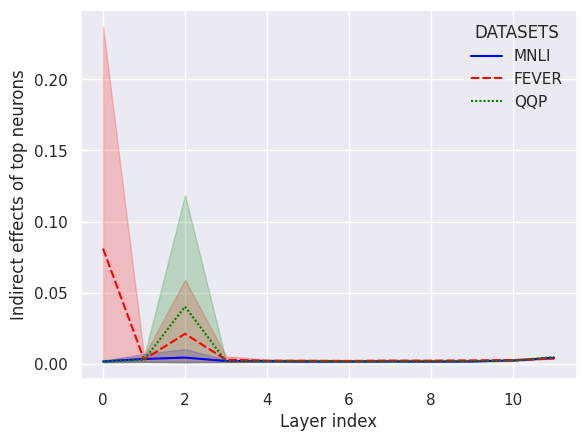

In [5]:
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="DATASETS", style="DATASETS", palette=['blue', 'red','green'])

## Baseline 

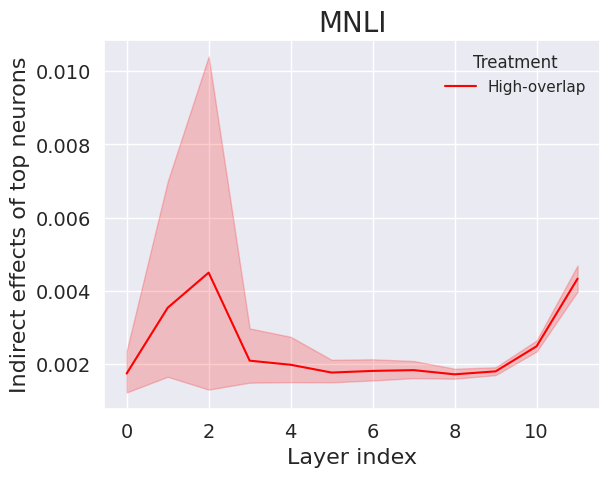

In [6]:
method_name = method_names[0]
dataset_name = datasets_names[0]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = [do] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set(font_scale=10)
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])
# plt.legend(title='MNLI', fontsize=20)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# for legend text
# plt.setp(sns.get_legend().get_texts(), fontsize='10')  
# # for legend title
# plt.setp(gfg.get_legend().get_title(), fontsize='20')

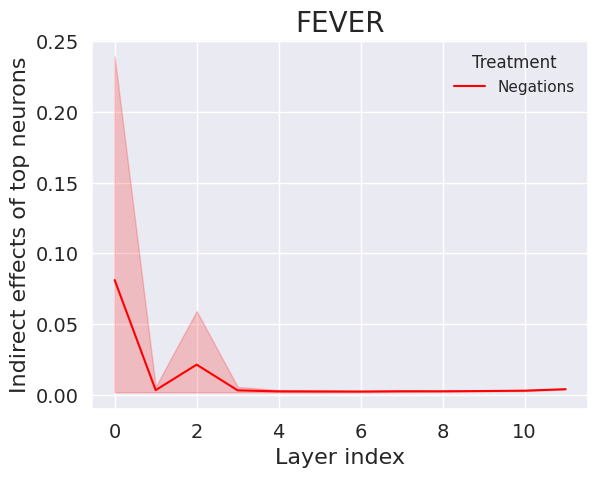

In [7]:
method_name = method_names[1]
dataset_name = datasets_names[1]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = ['Negations'] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set_theme(style="darkgrid")
# sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red']).set(title=f'{method_name}')
sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)

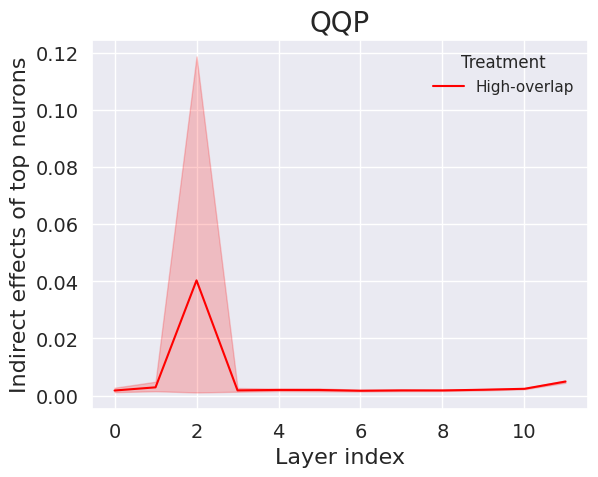

In [8]:
method_name = method_names[2]
dataset_name = datasets_names[2]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = [do] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])#.set(title=f'{dataset_name}')
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)

## Reweight

In [14]:
method_names = ['reweight2', 'reweight_fever', 'reweight_qqp_mysplit']

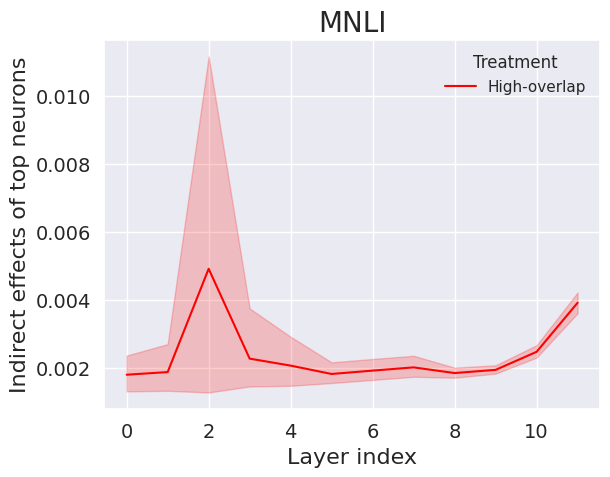

In [15]:
method_name = method_names[0]
dataset_name = datasets_names[0]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = [do] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set(font_scale=10)
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])
# plt.legend(title='MNLI', fontsize=20)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# for legend text
# plt.setp(sns.get_legend().get_texts(), fontsize='10')  
# # for legend title
# plt.setp(gfg.get_legend().get_title(), fontsize='20')

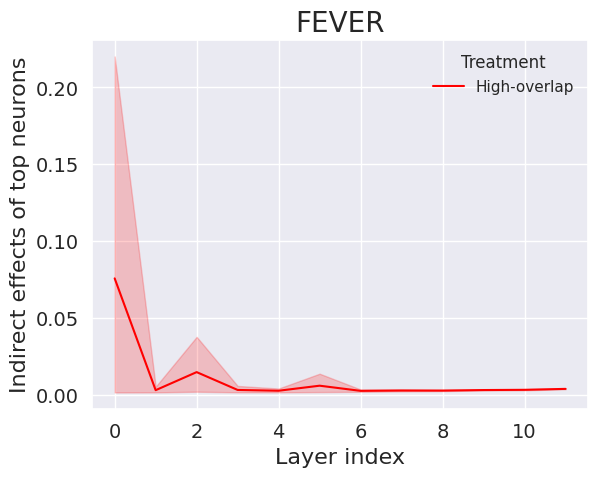

In [16]:
method_name = method_names[1]
dataset_name = datasets_names[1]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = [do] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set(font_scale=10)
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])
# plt.legend(title='MNLI', fontsize=20)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# for legend text
# plt.setp(sns.get_legend().get_texts(), fontsize='10')  
# # for legend title
# plt.setp(gfg.get_legend().get_title(), fontsize='20')

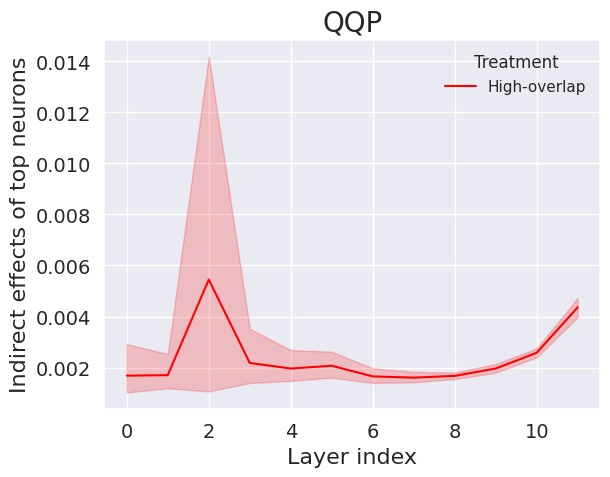

In [17]:
method_name = method_names[2]
dataset_name = datasets_names[2]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = [do] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set(font_scale=10)
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])
# plt.legend(title='MNLI', fontsize=20)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# for legend text
# plt.setp(sns.get_legend().get_texts(), fontsize='10')  
# # for legend title
# plt.setp(gfg.get_legend().get_title(), fontsize='20')

## Poe

In [20]:
method_names = ['poe2', 'poe_fever', 'poe_qqp_mysplit']

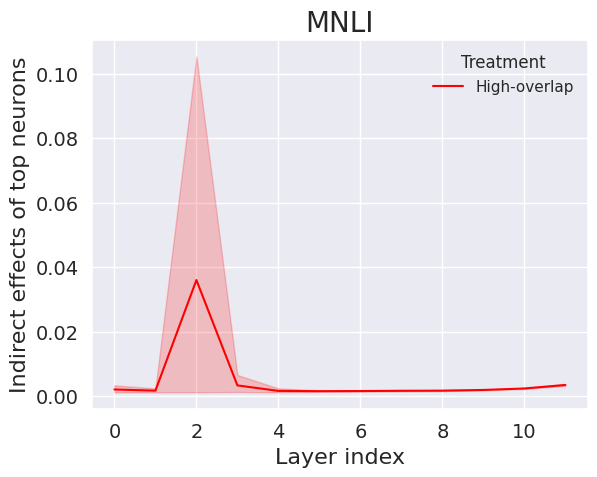

In [21]:
method_name = method_names[0]
dataset_name = datasets_names[0]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = [do] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set(font_scale=10)
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])
# plt.legend(title='MNLI', fontsize=20)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# for legend text
# plt.setp(sns.get_legend().get_texts(), fontsize='10')  
# # for legend title
# plt.setp(gfg.get_legend().get_title(), fontsize='20')

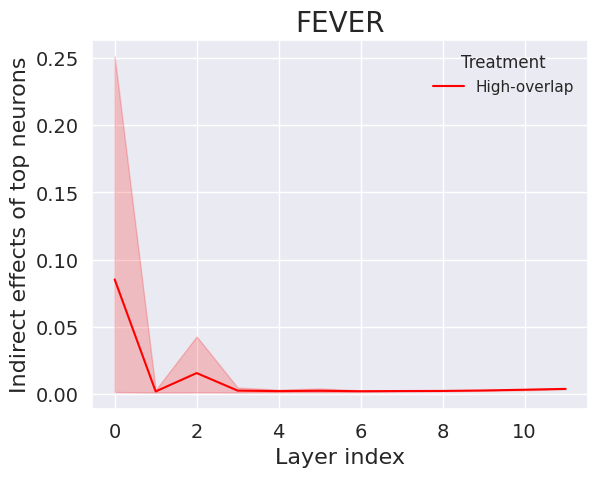

In [22]:
method_name = method_names[1]
dataset_name = datasets_names[1]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = [do] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set(font_scale=10)
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])
# plt.legend(title='MNLI', fontsize=20)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# for legend text
# plt.setp(sns.get_legend().get_texts(), fontsize='10')  
# # for legend title
# plt.setp(gfg.get_legend().get_title(), fontsize='20')

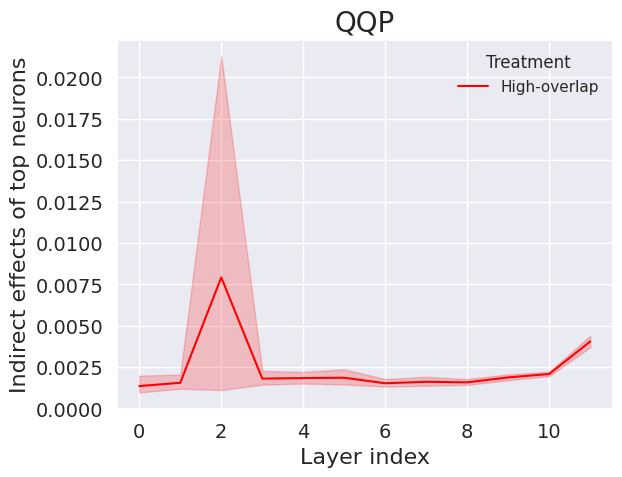

In [23]:
method_name = method_names[2]
dataset_name = datasets_names[2]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = [do] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set(font_scale=10)
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])
# plt.legend(title='MNLI', fontsize=20)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# for legend text
# plt.setp(sns.get_legend().get_texts(), fontsize='10')  
# # for legend title
# plt.setp(gfg.get_legend().get_title(), fontsize='20')